In [1]:
# pip install "pandasai>=3.0.0b2"
# pip install pandasai-openai
# pip install notebook
# Had to unstall duckdb and install duckdb 1.1.3# Python Version: Python 3.11.9

In [2]:
import pandasai as pai
from pandasai_openai.openai import OpenAI
import pandas as pd
from dotenv import load_dotenv
import os
from IPython.display import Image, display

In [3]:
llm = OpenAI(os.getenv('OPENAI_API_KEY'))

In [4]:
pai.config.set({
    "llm": llm
})

In [5]:
print(f"- Model: {llm.model}")

- Model: gpt-4.1-mini


In [6]:
# Sample DataFrame
df = pai.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "revenue": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})

In [7]:
print("\nSample Data Frame\n")
print("\nWhich are the top 5 countries by sales?")
result = df.chat('Which are the top 5 countries by sales?')
print(result)


Sample Data Frame


Which are the top 5 countries by sales?
          country  revenue
0           China     7000
1   United States     5000
2           Japan     4500
3         Germany     4100
4  United Kingdom     3200


In [8]:
print("\nWhat is the total sales for the top 3 countries by sales?")
result = df.chat("What is the total sales for the top 3 countries by sales?")
print(result)


What is the total sales for the top 3 countries by sales?
16500.0


In [9]:
print("\nUsing rfm_segmented.csv data\n")
df = pai.read_csv("rfm_segmented.csv")


Using rfm_segmented.csv data



In [10]:
# Quick look at the data
df.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,12346,40156,1,77183.60,1,1,5,115,Others
1,12347,8076,6,4085.18,3,5,5,355,Loyal Customers
2,12348,13415,4,1797.24,2,4,4,244,At Risk
3,12349,3978,1,1757.55,4,1,4,414,Recent but Infrequent
4,12350,38550,1,334.40,1,1,2,112,Others


In [11]:
#Query #1: "How many customers are in each segment?"
result = df.chat("How many customers are in each segment?")
print("\nResults using PandasAI - Query #1 How many customers are in each segment?\n")
print(result)

cust_segment = (df.groupby("Segment", dropna=False)["CustomerID"]
         .count().sort_values(ascending=False)
         .rename("CustomerCount")
         .reset_index())
print("\nResults using Pandas\n")
print(cust_segment)


Results using PandasAI - Query #1 How many customers are in each segment?

                 Segment  CustomerCount
0                 Others           1773
1         Best Customers            938
2        Loyal Customers            765
3  Recent but Infrequent            317
4                At Risk            287
5         Lost Customers            184
6     Big Spenders (New)             70

Results using Pandas

                 Segment  CustomerCount
0                 Others           1773
1         Best Customers            938
2        Loyal Customers            765
3  Recent but Infrequent            317
4                At Risk            287
5         Lost Customers            184
6     Big Spenders (New)             70


In [12]:
#Query #2: "What is the average monetary value for each customer segment?"

result = df.chat("What is the average monetary value for each customer segment?")
print("\n Results using PandasAI - Query #2 What is the average monetary value for each customer segment?\n")
print(result)

avg_monetary = (df.groupby("Segment", as_index=False)["Monetary"]
                  .mean()
                  .rename(columns={"Monetary": "Avg_Monetary"})
                  .sort_values("Avg_Monetary", ascending=False))

print("\nResults using Pandas\n")
print(avg_monetary)


 Results using PandasAI - Query #2 What is the average monetary value for each customer segment?

                 Segment  Avg_Monetary
0         Best Customers   6061.292665
1        Loyal Customers   1885.259871
2                At Risk   1730.935714
3                 Others    584.521220
4  Recent but Infrequent    449.752461
5     Big Spenders (New)    310.824143
6         Lost Customers    144.910109

Results using Pandas

                 Segment  Avg_Monetary
1         Best Customers   6061.292665
4        Loyal Customers   1885.259871
0                At Risk   1730.935714
5                 Others    584.521220
6  Recent but Infrequent    449.752461
2     Big Spenders (New)    310.824143
3         Lost Customers    144.910109


In [13]:
#Query #3: "Plot a bar chart displaying the distribution of customers across the different segments."

result = df.chat("Plot a bar chart displaying the distribution of customers across the different segments")
print("\nResults using PandasAI - Query #3 Plot a bar chart displaying the distribution of customers across the different segments\n")
print(result)


Results using PandasAI - Query #3 Plot a bar chart displaying the distribution of customers across the different segments

exports\charts\temp_chart_55ace933-46fd-4624-9acc-5fdb425d96bb.png


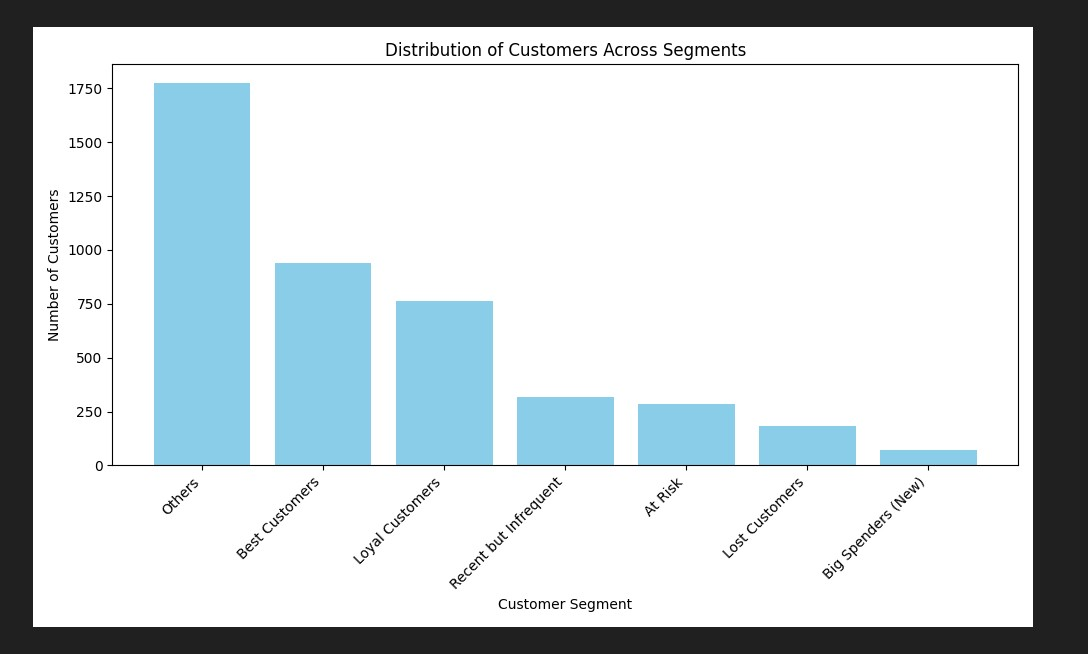

In [14]:
display(Image(filename='demo_pandasai.jpg'))